In [14]:
import pandas as pd
import numpy as np
import seaborn as sb
import tweepy
from matplotlib import pyplot
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#script_path = os.path.dirname(os.path.abspath(__file__))
keysFile = open(("keys.txt"), "r")
keys = keysFile.read().splitlines()
keysFile.close()
CONSUMER_KEY = keys[0]
CONSUMER_SECRET = keys[1]
ACCESS_TOKEN = keys[2]
ACCESS_TOKEN_SECRET = keys[3]

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

In [3]:
data = pd.read_csv("my_csv.csv")
data.columns = ['index','user','normal','retweeted','quoted','favorited','id','timestamp']
data.timestamp = pd.to_datetime(data.timestamp)
def localizeConvert(x):
    x = x.tz_localize('GMT')
    x = x.tz_convert('US/Central')
    return x
data.timestamp = data.timestamp.apply(lambda x: localizeConvert(x))
data.index = data.timestamp
#data.drop(columns=['Unnamed: 0','timestamp'],axis=1, inplace=True)

In [5]:
currentPage = -1
friendsList = []
while currentPage != 0:
    pagedList = api.friends(cursor=currentPage)
    currentPage = pagedList[-1][1]
    for x in pagedList:
        for k in x:
            if type(k) is not long and type(k) is not int:
                friendsList.append(k.name)

temp = pd.DataFrame({'Count' : [len(friendsList), len(data['user'].unique())],
                     'V1' : ['FollowersTotal','FollowersTweeted']})
temp.index = temp['V1']



<h1>How many people I follow vs how many of them have tweeted in this time period </h1>

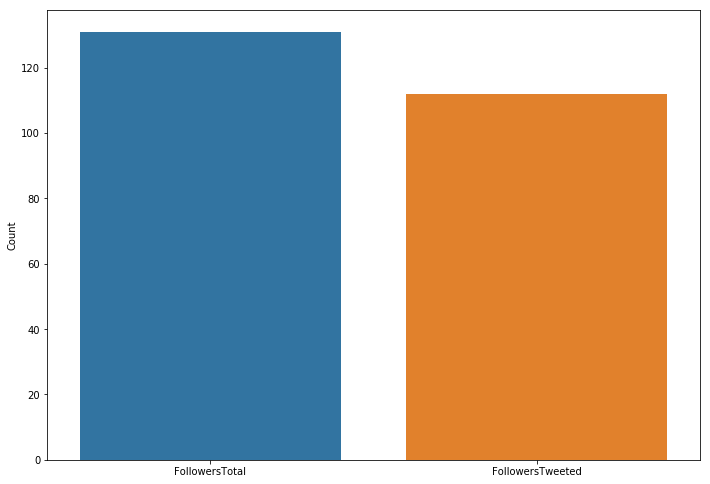

In [22]:
a4_dims = (11.7, 8.27)
fig, axis = pyplot.subplots(figsize=a4_dims)
ax = sb.barplot(ax=axis, y='Count',x='V1',data=temp)
ax.set_xlabel('')
plt.show()

In [7]:
uniqueList = set(data['user'].unique())
uniqueDict = {k: 0 for k in uniqueList}
for x in (data['user']):
    if (uniqueDict.has_key(x)):
        uniqueDict[x] = uniqueDict.get(x) + 1

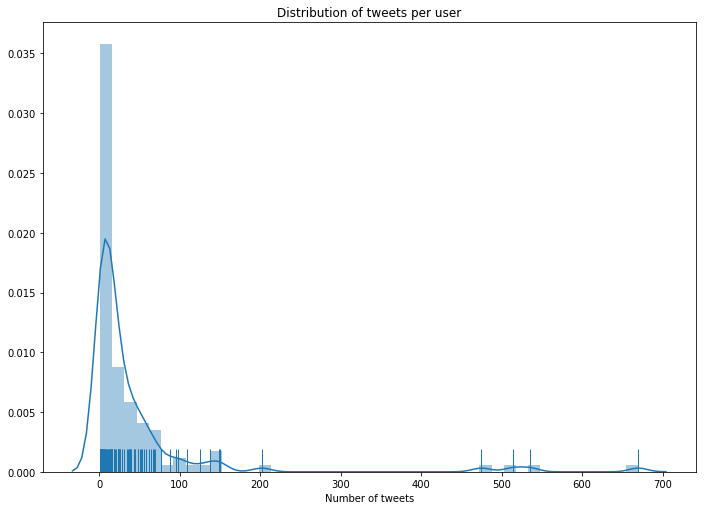

In [24]:
fig, axis = pyplot.subplots(figsize=a4_dims)
ax = sb.distplot( uniqueDict.values(),ax=axis, rug=True)
plt.title('Distribution of tweets per user')
plt.xlabel('Number of tweets')
plt.show()
#for w in sorted(uniqueDict, key=uniqueDict.get, reverse=True):
#    print w, uniqueDict[w]

<h1>TODO: make comparison of top ~5 tweeters and what they do(retweet, original etc)</h1>

In [67]:
sorted(uniqueDict, key=uniqueDict.get, reverse=True)[:5]

['The Kansas City Star',
 'Bandeauxx.',
 'Crunchyroll',
 'Anime News Network',
 'NEST HQ']

In [26]:
for column in data[['normal','retweeted','quoted']]:
    print data[column].value_counts()

True     3772
False    1526
Name: normal, dtype: int64
False    3772
True     1526
Name: retweeted, dtype: int64
False    4980
True      318
Name: quoted, dtype: int64


In [39]:
data[['normal','retweeted']].count()

normal       5298
retweeted    5298
dtype: int64

In [38]:
data[['normal','retweeted']].groupby(data.timestamp.dt.hour).mean()

,normal,retweeted
timestamp,,
0,0.828746,0.171254
1,0.656863,0.343137
2,0.803191,0.196809
3,0.795122,0.204878
4,0.796296,0.203704
5,0.940000,0.060000
6,0.840532,0.159468
7,0.729469,0.270531
8,0.666667,0.333333


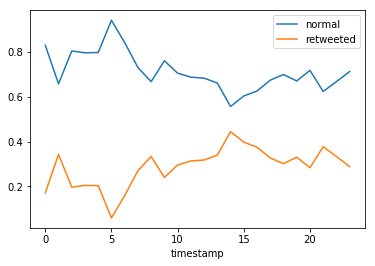

In [41]:
data[['normal','retweeted']].groupby(data.timestamp.dt.hour).mean().plot()